Configure um ambiente virtual python conforme o arquivo requirements. 

In [5]:
!curl https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip --output ../data/raw/cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 26 65.4M   26 17.4M    0     0  14.3M      0  0:00:04  0:00:01  0:00:03 14.3M
 76 65.4M   76 49.9M    0     0  22.6M      0  0:00:02  0:00:02 --:--:-- 22.6M
100 65.4M  100 65.4M    0     0  24.4M      0  0:00:02  0:00:02 --:--:-- 24.5M


In [6]:
!tar -xf ../data/raw/cats_and_dogs_filtered.zip -C ../data/raw

In [7]:
!del "..\data\raw\cats_and_dogs_filtered.zip"

In [8]:
%pip install tensorflow
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
dataset_dir = os.path.join('..', 'data', 'raw', 'cats_and_dogs_filtered')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cats')))
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))

dataset_validation_dir = os.path.join(dataset_dir, 'validation')
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cats')))
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dogs')))

print('Train cats:', dataset_train_cats_len)
print('Train dogs:', dataset_train_dogs_len)
print('Validation cats:', dataset_validation_cats_len)
print('Validation dogs:', dataset_validation_dogs_len)

Train cats: 1000
Train dogs: 1000
Validation cats: 500
Validation dogs: 500


In [11]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 32
epochs = 20
learning_rate = 0.001

class_names = ['cat', 'dog']

In [12]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle = True,
)

Found 2000 files belonging to 2 classes.


In [13]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle = True,
)

Found 1000 files belonging to 2 classes.


In [14]:
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 26
Test Dataset Cardinality: 6


In [15]:
def plot_dataset(dataset):
    plt.gcf().clear()
    plt.figure(figsize=(15, 15))

    for features, labels in dataset.take(1):
        for i in range(9):
            plt.subplot(3, 3, i + 1)
            plt.axis('off')
            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])
            

<Figure size 640x480 with 0 Axes>

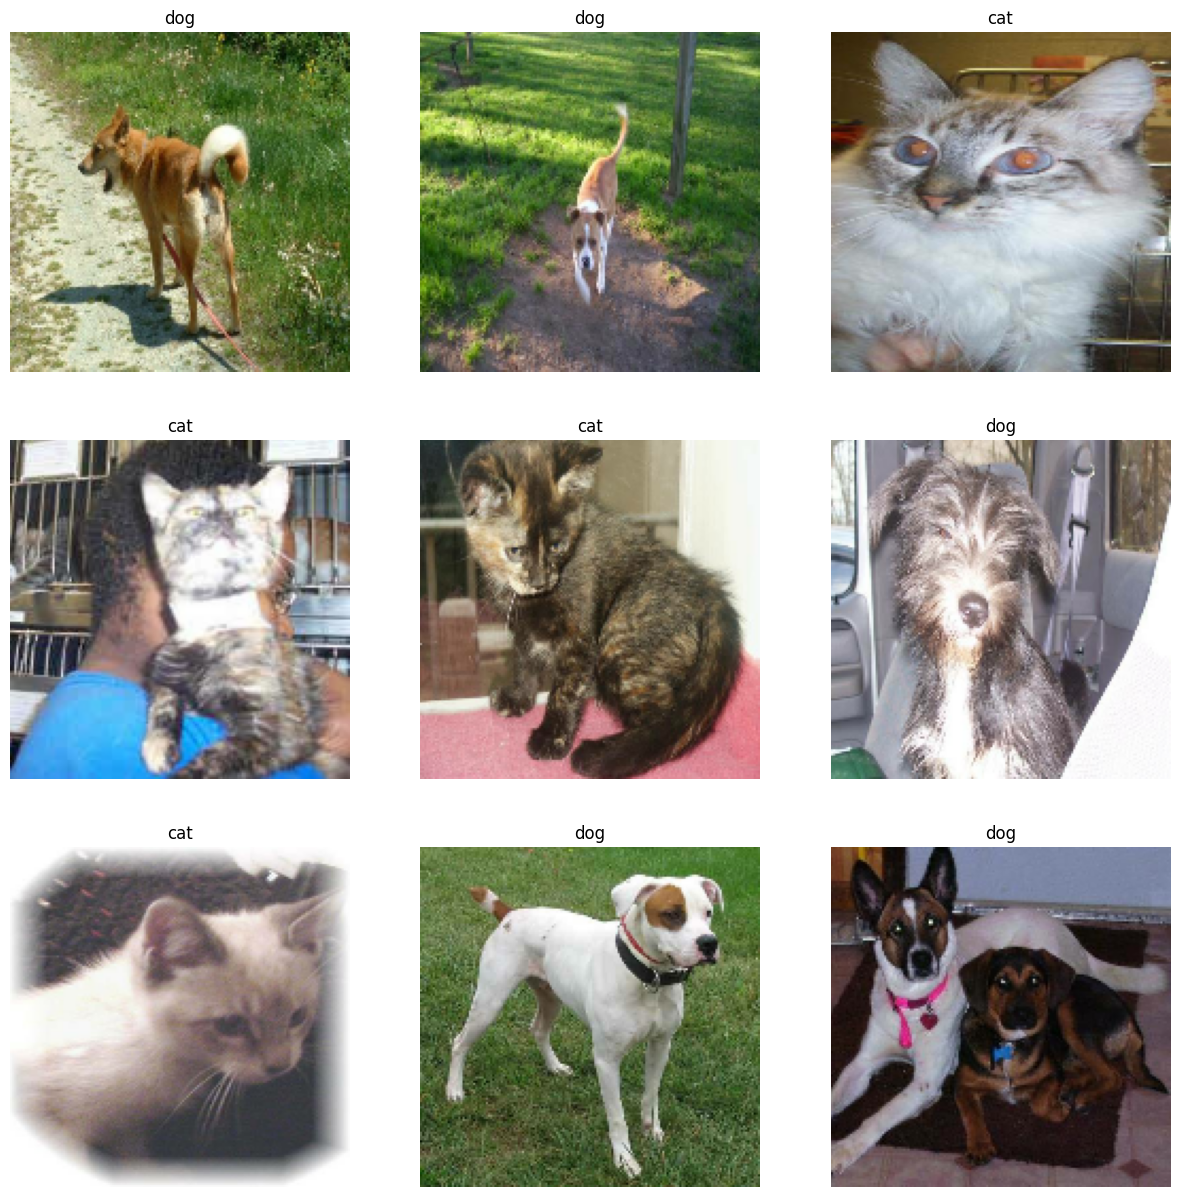

In [16]:
plot_dataset(dataset_train)

<Figure size 640x480 with 0 Axes>

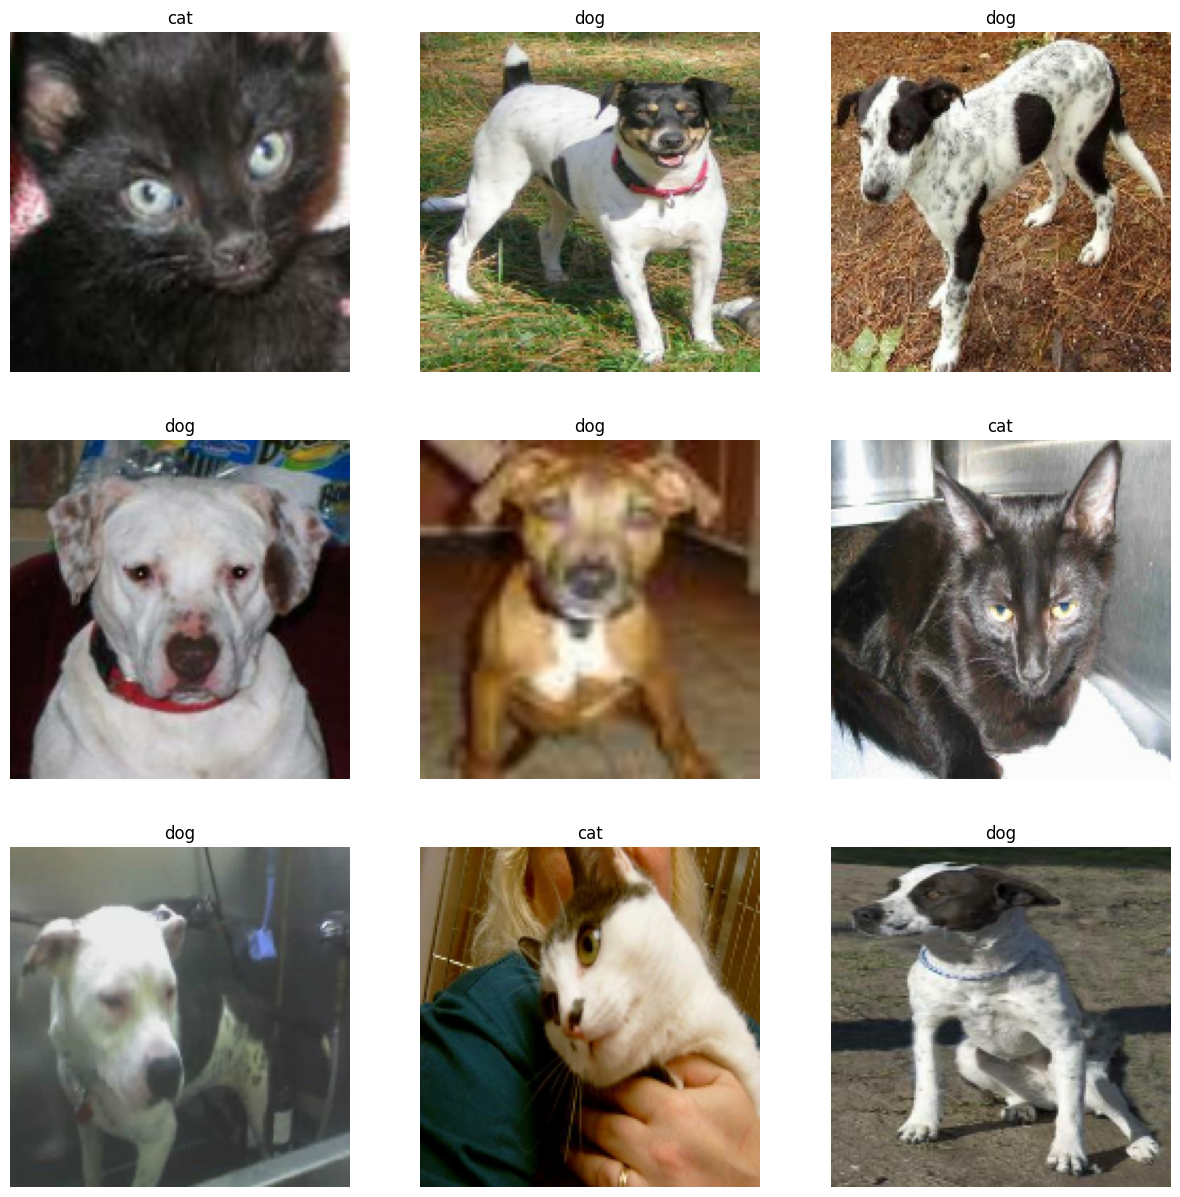

In [17]:
plot_dataset(dataset_validation)

<Figure size 640x480 with 0 Axes>

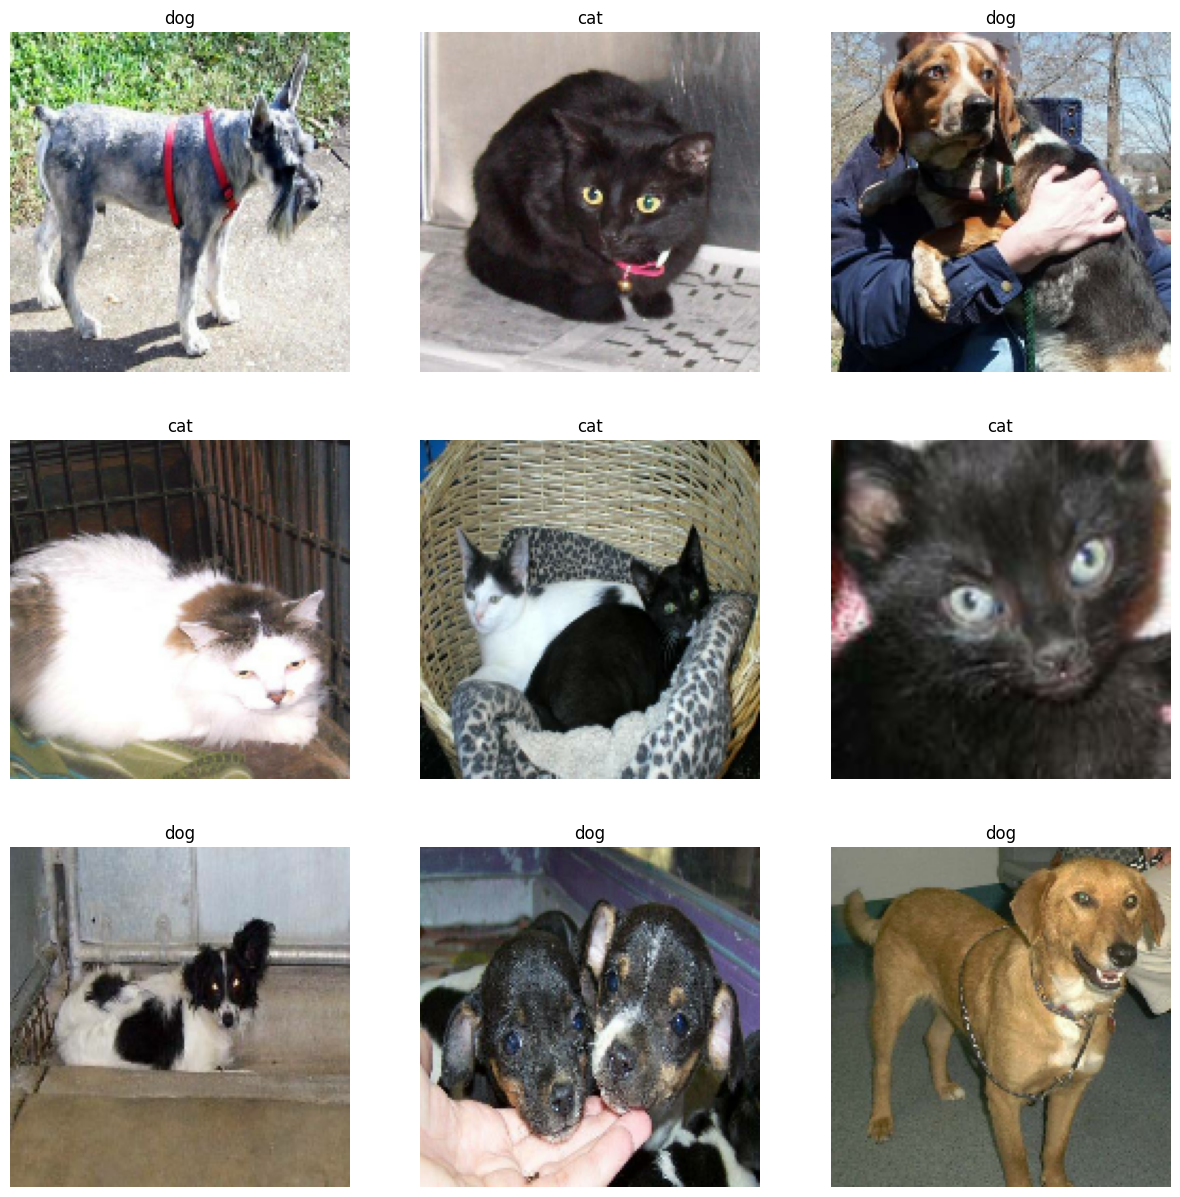

In [18]:
plot_dataset(dataset_test)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(
        1. / image_color_channel_size,
        input_shape = image_shape
        ),
        tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

model.summary()

d:\projeto-tcc\venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 160, 160, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 80, 80, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,300,641 (12.59 MB)

 Trainable params: 3,300,641 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    dataset_train,
    validation_data=dataset_validation,
    epochs=epochs
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 354ms/step - accuracy: 0.5468 - loss: 0.7436 - val_accuracy: 0.6708 - val_loss: 0.6241
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.6968 - loss: 0.5973 - val_accuracy: 0.7116 - val_loss: 0.5696
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.7415 - loss: 0.5354 - val_accuracy: 0.7153 - val_loss: 0.5683
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.7753 - loss: 0.4662 - val_accuracy: 0.7228 - val_loss: 0.5939
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.8261 - loss: 0.3899 - val_accuracy: 0.7017 - val_loss: 0.6543
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.8417 - loss: 0.3629 - val_accuracy: 0.6918 - val_loss: 0.6956
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.8963 - loss: 0.2440 - val_accuracy: 0.7166 - val_loss: 0.6803
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - accuracy: 0.9309 - loss: 0.1847 - val_accu

In [26]:
def plot_dataset_predictions(dataset):

    features, labels = dataset.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print('Labels:      %s' % labels)
    print('Predictions: %s' % predictions.numpy())
    
    plt.gcf().clear()
    plt.figure(figsize=(15, 15))

    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

Labels:      [0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0]
Predictions: [0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0]


<Figure size 640x480 with 0 Axes>

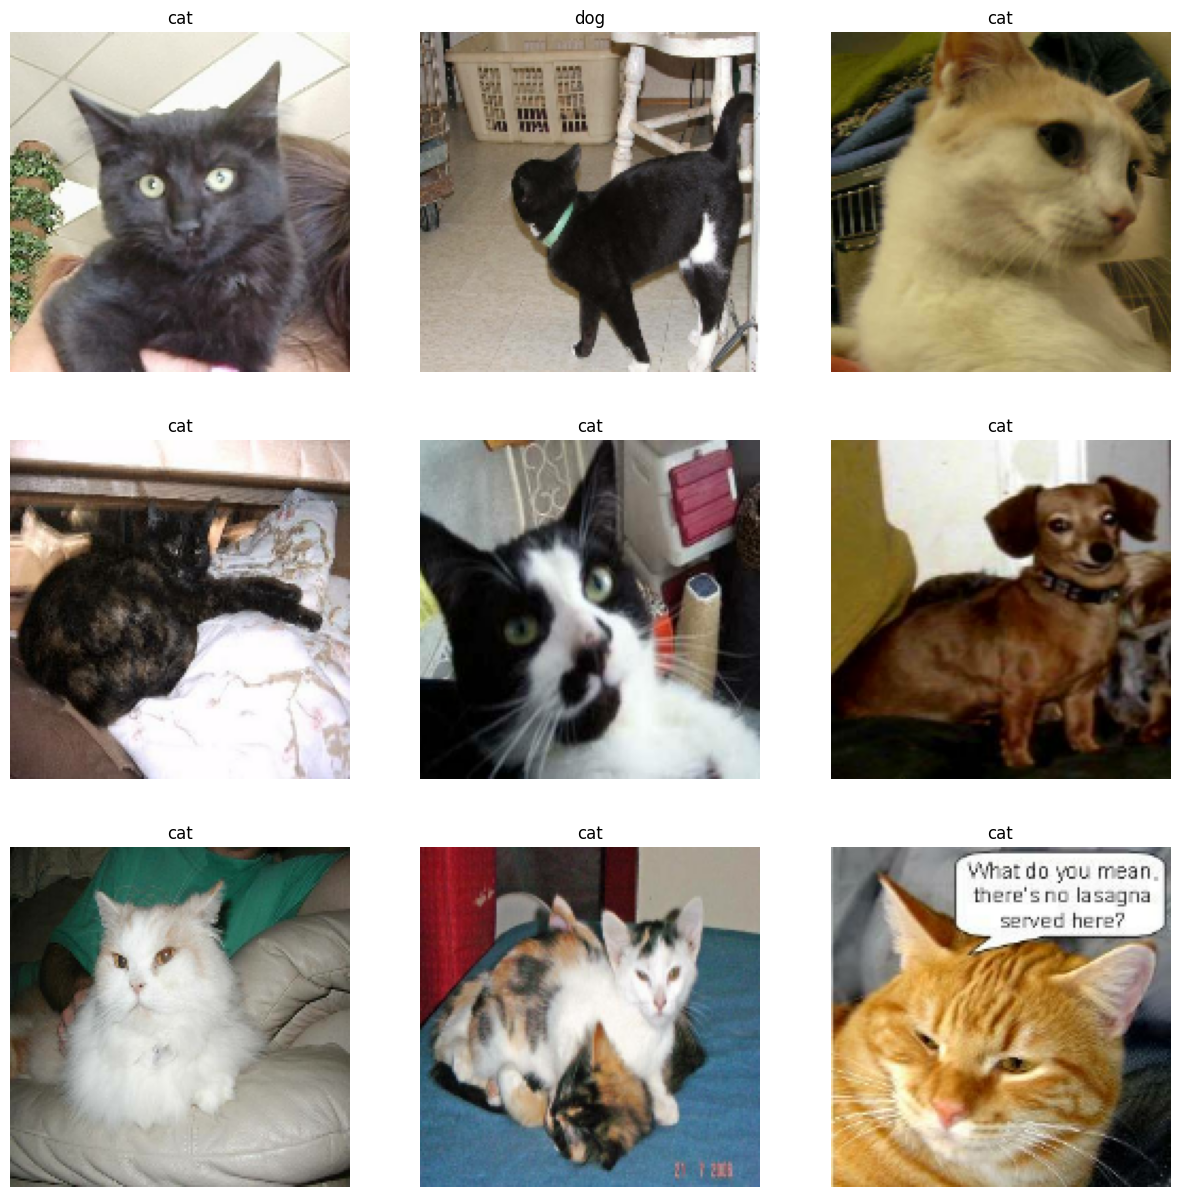

In [27]:
plot_dataset_predictions(dataset_test)